In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [17]:
df = pd.read_csv(r"E:\Reyhane\Data for Project for the future\archiveSIR\per_location_fitted_params.csv")

In [21]:
df.head()

,Province,Country,R0,Beta,Gamma,FirstDayNum,FirstDate,FirstDayInfectedCount,PeakDayNum,PeakDate,PeakDayInfectedCount,TotalPopulation,PopFactor,EstimatedSusceptiblePopulation,Loss
0,Alabama,US,5.483404e+14,0.298808,5.449319e-16,79,2020-03-19,50,198,2020-07-16,1619.7870,35529995.0,0.000044,1569.9100,30.506640
1,Alaska,US,8.128285e+01,0.311350,3.830454e-03,75,2020-03-15,3,103,2020-04-12,173.1887,35530000.0,0.000005,182.8906,1.764368
2,Arizona,US,8.937220e+01,0.417029,4.666209e-03,33,2020-02-02,1,100,2020-04-09,1947.1550,35529999.0,0.000058,2074.8220,26.640030
3,Arkansas,US,5.785776e+43,0.242557,4.192293e-45,75,2020-03-15,30,221,2020-08-08,798.1970,35530000.0,0.000022,768.8080,12.141810
4,California,US,3.974427e+01,0.220788,5.555213e-03,46,2020-02-15,1,112,2020-04-21,21484.4200,35529998.0,0.000685,24354.2300,68.303650


In [102]:
data = df[df["Province"] == "Alaska"].iloc[0]

In [104]:
data

Province                              Alaska
Country                                   US
R0                                  81.28285
Beta                                 0.31135
Gamma                                0.00383
FirstDayNum                               75
FirstDate                         2020-03-15
FirstDayInfectedCount                      3
PeakDayNum                               103
PeakDate                          2020-04-12
PeakDayInfectedCount                173.1887
TotalPopulation                   35530000.0
PopFactor                           0.000005
EstimatedSusceptiblePopulation      182.8906
Loss                                1.764368
Name: 1, dtype: object

# SIR Model

In [110]:
beta = data["Beta"]
gamma = data["Gamma"]
N = data["TotalPopulation"]
I0 = data["FirstDayInfectedCount"]
S0 = N - I0
R0 = 0

In [112]:
def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

In [114]:
days = 250
t = np.linspace(0, days, days)

In [116]:
y0 = [S0, I0, R0]

In [118]:
solution = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = solution.T

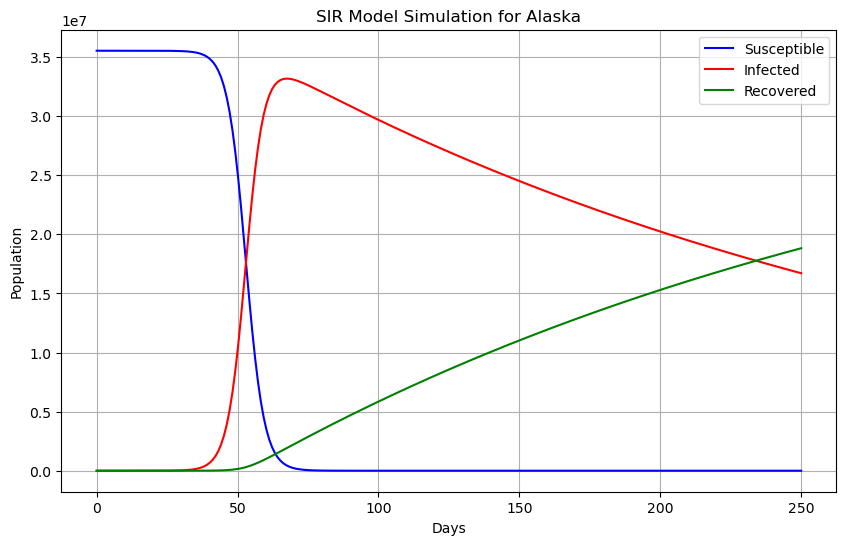

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptible", color="blue")
plt.plot(t, I, label="Infected", color="red")
plt.plot(t, R, label="Recovered", color="green")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title(f"SIR Model Simulation for {"Alaska"}")
plt.legend()
plt.grid()
plt.show()